In [63]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [64]:
data = pd.read_csv('data/btc_data.csv', index_col=0)

In [65]:
data

,high,low,open,volumefrom,volumeto,close,market_cap,progression daily,progression tomorrow,target,ema_26,ema_12,macd,rsi,relative_volume,obv,atr,bollinger_upper,bollinger_lower,k,momentum,difficulty
2011-01-01,0.3000,0.292,0.3000,2821.24,8.419500e+02,0.3000,NaN,0.000000,0.000000,0,0.251628,0.272215,0.020587,75.041736,0.433468,5.683560e+03,0.018136,0.302597,0.209763,98.360656,0.060,NaN
2011-01-02,0.3000,0.289,0.3000,5352.11,1.584660e+03,0.3000,NaN,0.000000,0.000000,0,0.255211,0.276490,0.021279,74.831650,0.784203,4.098900e+03,0.018214,0.307253,0.213107,98.360656,0.050,NaN
2011-01-03,0.3000,0.290,0.3000,1425.19,4.208500e+02,0.2950,NaN,0.000000,-0.016667,0,0.258529,0.280107,0.021578,75.402884,0.227126,3.678050e+03,0.016429,0.311694,0.215676,98.360656,0.050,NaN
2011-01-04,0.2999,0.289,0.2950,1879.00,5.483300e+02,0.2989,NaN,-0.016667,0.013220,1,0.261230,0.282398,0.021168,64.583333,0.317246,3.129720e+03,0.015286,0.315355,0.216845,90.163934,0.047,NaN
2011-01-05,0.2990,0.290,0.2989,357.16,1.061900e+02,0.2990,NaN,0.013220,0.000335,1,0.264021,0.284937,0.020916,90.397805,0.063656,3.235910e+03,0.014000,0.318771,0.219319,96.500000,0.049,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13,27110.9100,26674.970,26756.2300,18507.04,4.967794e+08,26862.9000,5.216077e+11,-0.004279,0.003987,1,27129.215560,27294.402418,165.186858,46.835697,0.904417,1.270529e+10,785.304286,28397.807436,25925.062564,10.940893,-750.990,5.732151e+13
2023-10-14,26982.7800,26810.020,26862.9000,5865.21,1.576854e+08,26854.5200,5.236556e+11,0.003987,-0.000312,0,27109.488482,27228.017431,118.528949,49.455572,0.288510,1.286298e+10,786.607857,28390.511290,25960.107710,16.135237,-565.760,5.732151e+13
2023-10-15,27297.2600,26813.060,26854.5200,10978.68,2.971100e+08,27177.4100,5.239792e+11,-0.000312,0.012024,1,27090.601927,27170.556287,79.954360,48.700891,0.555745,1.256587e+10,738.972857,28353.377450,26056.549550,15.727169,-935.280,5.732151e+13
2023-10-16,30009.1500,27131.480,27177.4100,66720.48,1.884463e+09,28518.3700,5.296435e+11,0.012024,0.049341,1,27097.032155,27171.610705,74.578550,38.382575,3.228924,1.445033e+10,848.527857,28315.553845,26182.321155,18.572004,-237.180,5.732151e+13


In [66]:
data['open'].describe()

count     4673.000000
mean     10010.712764
std      14842.749681
min          0.295000
25%        237.410000
50%       2052.430000
75%      11657.810000
max      67549.140000
Name: open, dtype: float64

In [67]:
# Sélectionner les caractéristiques et exclure la dernière ligne
features = data.drop(columns=['progression tomorrow', 'target', 'close', 'high', 'low', 'volumefrom', 'market_cap', 'difficulty']).iloc[:-1, :]
target = data['target'].iloc[:-1]

In [68]:
# Définir la taille de la fenêtre initiale
window_size = 1000

In [69]:
#Test avec RandomForest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

"""  
# Initialiser les listes pour stocker les prédictions et les vraies valeurs
predictions = []
actuals = []

# Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
for i in range(window_size, len(data) - 1):
    # Diviser les données en ensembles d'entraînement et de test
    X_train = features.iloc[i-window_size:i, :]
    y_train = target.iloc[i-window_size:i]
    X_test = features.iloc[i:i+1, :]
    y_test = target.iloc[i]

    #Normaliser les données
    scaler = StandardScaler()
    X_train_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Entraîner un modèle
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Faire une prédiction
    prediction = model.predict(X_test)[0]
    
    # Stocker les prédictions et les vraies valeurs
    predictions.append(prediction)
    actuals.append(y_test)

# Évaluer le modèle
accuracy = accuracy_score(actuals, predictions)
print(f'Model Accuracy: {accuracy * 100:.2f}%')"""


"  \n# Initialiser les listes pour stocker les prédictions et les vraies valeurs\npredictions = []\nactuals = []\n\n# Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données\nfor i in range(window_size, len(data) - 1):\n    # Diviser les données en ensembles d'entraînement et de test\n    X_train = features.iloc[i-window_size:i, :]\n    y_train = target.iloc[i-window_size:i]\n    X_test = features.iloc[i:i+1, :]\n    y_test = target.iloc[i]\n\n    #Normaliser les données\n    scaler = StandardScaler()\n    X_train_train = scaler.fit_transform(X_train)\n    X_test = scaler.transform(X_test)\n    \n    # Entraîner un modèle\n    model = RandomForestClassifier()\n    model.fit(X_train, y_train)\n    \n    # Faire une prédiction\n    prediction = model.predict(X_test)[0]\n    \n    # Stocker les prédictions et les vraies valeurs\n    predictions.append(prediction)\n    actuals.append(y_test)\n\n# Évaluer le modèle\naccuracy = accuracy_score(actuals, predictions)\

In [70]:
def train_model(data, model, features, target, window_size):
      
      # Initialiser les listes pour stocker les prédictions et les vraies valeurs
      predictions = []
      actuals = []

      # Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
      for i in range(window_size, len(data) - 1):
            # Diviser les données en ensembles d'entraînement et de test
            X_train = features.iloc[i-window_size:i, :]
            y_train = target.iloc[i-window_size:i]
            X_test = features.iloc[i:i+1, :]
            y_test = target.iloc[i]

            #Normaliser les données
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            
            # Entraîner un modèle
            model.fit(X_train, y_train)
            
            # Faire une prédiction
            prediction = model.predict(X_test)[0]
            
            # Stocker les prédictions et les vraies valeurs
            predictions.append(prediction)
            actuals.append(y_test)

      # Évaluer le modèle
      accuracy = accuracy_score(actuals, predictions)
      print(f'Model Accuracy: {accuracy * 100:.2f}%')

In [71]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="most_frequent")
train_model(data, dummy_model, features, target, window_size)

Model Accuracy: 52.23%


In [72]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
train_model(data, logistic_regression, features, target, window_size)

Model Accuracy: 56.26%


In [73]:
def plot_feature_importance(model, feature_names):
    # Récupérer les coefficients du modèle
    coefficients = model.coef_[0]
    
    # Créer un DataFrame pour stocker les caractéristiques et leurs importances
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coefficients
    })
    
    # Trier le DataFrame en fonction de l'importance
    feature_importance = feature_importance.sort_values(by='Importance', key=abs, ascending=False)
    
    # Visualiser l'importance des caractéristiques
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Logistic Regression')
    plt.gca().invert_yaxis()  # Pour afficher la caractéristique la plus importante en haut
    plt.show()

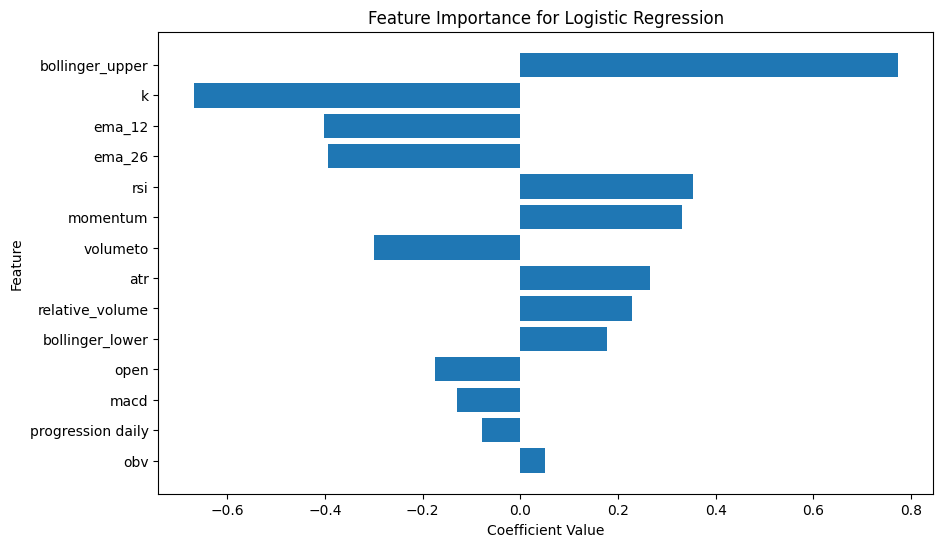

In [74]:
plot_feature_importance(logistic_regression, features.columns)

In [167]:
from sklearn.metrics import log_loss

def train_model_proba(data, model, features, target, window_size):
      
    # Initialiser les listes pour stocker les probabilités prédites et les vraies valeurs
    predicted_probs = []
    actuals = []

    # Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
    for i in range(window_size, len(data) - 1):
        # Diviser les données en ensembles d'entraînement et de test
        X_train = features.iloc[i-window_size:i, :]
        y_train = target.iloc[i-window_size:i]
        X_test = features.iloc[i:i+1, :]
        y_test = target.iloc[i]

        # Normaliser les données
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Entraîner un modèle
        model.fit(X_train, y_train)
        
        # Obtenir les probabilités prédites pour la classe positive (par exemple, 1)
        prediction_prob = model.predict_proba(X_test)[:, 1]
        
        # Stocker les probabilités prédites et les vraies valeurs
        predicted_probs.extend(prediction_prob)
        actuals.append(y_test)

    # Calculer la Log Loss
    loss = log_loss(actuals, predicted_probs)
    print(f'Log Loss: {loss:.4f}')

Log Loss: 0.6904


In [166]:
train_model_proba(data, logistic_regression, features, target, window_size)

Log Loss: 0.6904


In [ ]:
def earn_metric(predicted_probs, n_days, c):
      base = c
      progressions = []
      for i in range(n_days+1):
            progressions.append(data.iloc[window_size+i]['progression tomorrow']+1)

            c *= predicted_probs[i] * progressions[i] + (1 - predicted_probs[i])

      return c / base

In [ ]:
from sklearn.metrics import log_loss

def train_model_proba_metric(data, model, features, target, window_size):
      
    # Initialiser les listes pour stocker les probabilités prédites et les vraies valeurs
    predicted_probs = []
    actuals = []
    earnings = []

    # Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
    for i in range(window_size, len(data) - 1):
        # Diviser les données en ensembles d'entraînement et de test
        X_train = features.iloc[i-window_size:i, :]
        y_train = target.iloc[i-window_size:i]
        X_test = features.iloc[i:i+1, :]
        y_test = target.iloc[i]

        # Normaliser les données
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Entraîner un modèle
        model.fit(X_train, y_train)
        
        # Obtenir les probabilités prédites pour la classe positive (par exemple, 1)
        prediction_prob = model.predict_proba(X_test)[:, 1]
        
        # Stocker les probabilités prédites et les vraies valeurs
        predicted_probs.extend(prediction_prob)
        actuals.append(y_test)

    # Calculer la Log Loss
    loss = log_loss(actuals, predicted_probs)
    print(f'Log Loss: {loss:.4f}')

In [163]:
model = LogisticRegression()
# Initialiser les listes pour stocker les probabilités prédites et les vraies valeurs
predicted_probs = []
actuals = []
progressions = []

c = 100
base = 100

for i in range(31):
      # Diviser les données en ensembles d'entraînement et de test
      X_train = features.iloc[i:window_size+i, :]
      y_train = target.iloc[i:window_size+i]
      X_test = features.iloc[window_size+i : window_size+i+1, :]
      y_test = target.iloc[window_size+i]

      # Normaliser les données
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)

      # Entraîner un modèle
      model.fit(X_train_scaled, y_train)

      # Obtenir les probabilités prédites pour la classe positive (par exemple, 1)
      prediction_prob = model.predict_proba(X_test_scaled)[:, 1]

      # Stocker les probabilités prédites et les vraies valeurs
      predicted_probs.extend(prediction_prob)
      actuals.append(y_test)
      progressions.append(data.iloc[window_size+i]['progression tomorrow']+1)

      c *= predicted_probs[i] * progressions[i] + (1 - predicted_probs[i])
      base *= progressions[i]

print(c)
print(base)

132.33886546544136
150.91903719912486


In [159]:
progressions

[1.013347921225383,
 1.0256963938674153,
 1.0096842105263157,
 0.9862385321100919,
 0.988724453840733,
 0.8766928011404134,
 1.064959349593496,
 1.044507214291167,
 0.9991229352433855,
 1.0080468178493052,
 0.9854862119013063,
 1.005081001472754,
 1.0220528976481793,
 1.0065232974910394,
 0.9977921800441564,
 1.0199143468950749,
 1.032472531317797,
 1.0260286043516573,
 1.0443945299597013,
 0.9666645581630717,
 1.0312131919905771,
 1.0678342534424774,
 1.0883646303779415,
 1.016107016107016,
 1.0358946802794198,
 1.0529619255109453,
 1.1230602492733632,
 0.9079264815545905,
 0.956034399458885,
 0.9529007479280373,
 1.0973165040305473]

In [120]:
predicted_probs

[0.60040721080683,
 0.479947056414951,
 0.548275436829798,
 0.4563232295849949,
 0.4422230635316302,
 0.4140664330528999,
 0.4361871849836109,
 0.43460689675727876,
 0.3887822819149118,
 0.37363990309366896,
 0.387200441772941,
 0.4055367094480023,
 0.4258094386710644,
 0.39559626208842863,
 0.37528370294677327,
 0.3506205662074579,
 0.2927787947594506,
 0.3714842412223311,
 0.4105885437975299,
 0.5173820022615735,
 0.6836440433816976,
 0.704059632038982,
 0.7912445607844866,
 0.6580611503646457,
 0.6503088615065241,
 0.6730367978693366,
 0.7328463246790808,
 0.591138581770577,
 0.5713847961102692,
 0.5889210519426863,
 0.5655505962196752]

In [132]:
c=100

In [133]:
c *= (progressions[0]*predicted_probs[0] + 1 - predicted_probs[0])

In [134]:
c

100.80141881530018

In [137]:
c *= (progressions[1]*predicted_probs[1] + 1 - predicted_probs[1])

1.012332908597145

In [157]:
progressions[6]

1.064959349593496

In [160]:
c = 100

In [161]:
c *= predicted_probs[5] * progressions[5] + (1 - predicted_probs[5])

In [162]:
c

94.89426279984663

In [89]:
def train_model_grid(data, model, features, target, window_size):
      
      # Initialiser les listes pour stocker les prédictions et les vraies valeurs
      predictions = []
      actuals = []

      # Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
      for i in range(window_size, len(data) - 1):
            # Diviser les données en ensembles d'entraînement et de test
            X_train = features.iloc[i-window_size:i, :]
            y_train = target.iloc[i-window_size:i]
            X_test = features.iloc[i:i+1, :]
            y_test = target.iloc[i]

            #Normaliser les données
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            
            # Entraîner un modèle
            model.fit(X_train, y_train)
            
            # Faire une prédiction
            prediction = model.predict(X_test)[0]
            
            # Stocker les prédictions et les vraies valeurs
            predictions.append(prediction)
            actuals.append(y_test)

      # Évaluer le modèle
      accuracy = accuracy_score(actuals, predictions)
      return accuracy

In [90]:
# Définir la grille de paramètres
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 500],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [93]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
from IPython.display import display, HTML


# Créer une liste de combinaisons de paramètres
grid_list = list(ParameterGrid(param_grid))

# Pour boucler sur chaque combinaison :
best_accuracy = 0
best_params = None

for params in grid_list:
    try:
        # Instancier le modèle avec les paramètres
        model_instance = LogisticRegression(**params)
        
        # Appliquer la fonction train_model
        accuracy = train_model_grid(data, model_instance, features, target, window_size)
        
        # Si le modèle actuel a une meilleure précision que le précédent meilleur modèle, stocker sa précision et ses paramètres
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            print(f"Nouveaux meilleurs paramètres trouvés : {params}, accuracy : {accuracy}")

        
            
    except Exception as e:
        # Gérer les combinaisons de paramètres non compatibles
        error_message = f"Error with parameters {params}: {e}"
        display(HTML(f"<small>{error_message}</small>"))
        #pass

print(f"Best Model Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Parameters: {best_params}")


Nouveaux meilleurs paramètres trouvés : {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}, accuracy : 0.47766884531590414


Nouveaux meilleurs paramètres trouvés : {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}, accuracy : 0.5217864923747276
Nouveaux meilleurs paramètres trouvés : {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}, accuracy : 0.5296840958605664
Nouveaux meilleurs paramètres trouvés : {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}, accuracy : 0.5427559912854031


Nouveaux meilleurs paramètres trouvés : {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 50, 'penalty': 'none', 'solver': 'newton-cg'}, accuracy : 0.5642701525054467


Nouveaux meilleurs paramètres trouvés : {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 50, 'penalty': 'none', 'solver': 'sag'}, accuracy : 0.5650871459694989


Nouveaux meilleurs paramètres trouvés : {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'none', 'solver': 'sag'}, accuracy : 0.5675381263616558


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Initialiser les listes pour stocker les prédictions, les probabilités de prédiction et les vraies valeurs
predictions = []
prediction_probs = []
actuals = []

# Supposons que window_size et data sont définis
window_size = 100  # exemple de taille de fenêtre

# Boucle à travers les données de la taille de la fenêtre jusqu'à la fin des données
for i in range(window_size, len(data) - 1):
    # Diviser les données en ensembles d'entraînement et de test
    X_train = features.iloc[i-window_size:i, :]
    y_train = target.iloc[i-window_size:i]
    X_test = features.iloc[i:i+1, :]
    y_test = target.iloc[i]

    """#Normaliser les données
    scaler = StandardScaler()
    X_train_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)"""

    # Entraîner un modèle
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Faire une prédiction
    prediction = model.predict(X_test)[0]
    prediction_prob = model.predict_proba(X_test)[0][1]  # probabilité de la classe 1
    
    # Stocker les prédictions, les probabilités de prédiction et les vraies valeurs
    predictions.append(prediction)
    prediction_probs.append(prediction_prob)
    actuals.append(y_test)

# Évaluer le modèle
accuracy = accuracy_score(actuals, predictions)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Matrice de coût
cost_matrix = np.array([[0, 1],  # coût de classer 0 comme 0/1
                        [5, 0]])  # coût de classer 1 comme 0/1

# Matrice de confusion
conf_matrix = confusion_matrix(actuals, predictions)

# Coût total de mauvaise classification
total_cost = np.sum(conf_matrix * cost_matrix)
print(f'Total Cost of Misclassification: {total_cost}')

Model Accuracy: 52.62%
Total Cost of Misclassification: 5027
